In [1]:
import networkx as nx
import pygraphviz as pgv
import IPython.display
import inspect
import copy
from solarized_light import *

def showgraph(graph, *args, **kwargs):
    if nx.classes.graph.Graph in inspect.getmro(type(graph)):
        graph = nx.nx_agraph.to_agraph(graph)
    
    graph.add_node('FINAL', **FINAL)
    graph.add_node('VAR(LINENO)' , **VAR)
    graph.add_node('OPERATOR', **OPERATOR)
    graph.add_node('SOURCE', **SOURCE)

    graph.add_edge('FINAL','OPERATOR', style='invis')
    graph.add_edge('OPERATOR','SOURCE', style='invis')
    graph.add_edge('SOURCE','VAR(LINENO)', style='invis')
    graph.add_subgraph(['VAR(LINENO)','SOURCE','OPERATOR','FINAL'], name='cluster_legend', label='Legend')
    graphimage = graph.draw(format='png', prog='dot')
    return IPython.display.Image(graphimage, *args, **kwargs)


#showgraph(legend)

#Symbols Π σ ρ ⋈ θ ⋉ ⋊ ▷

# Procedural vs Optimized Representation

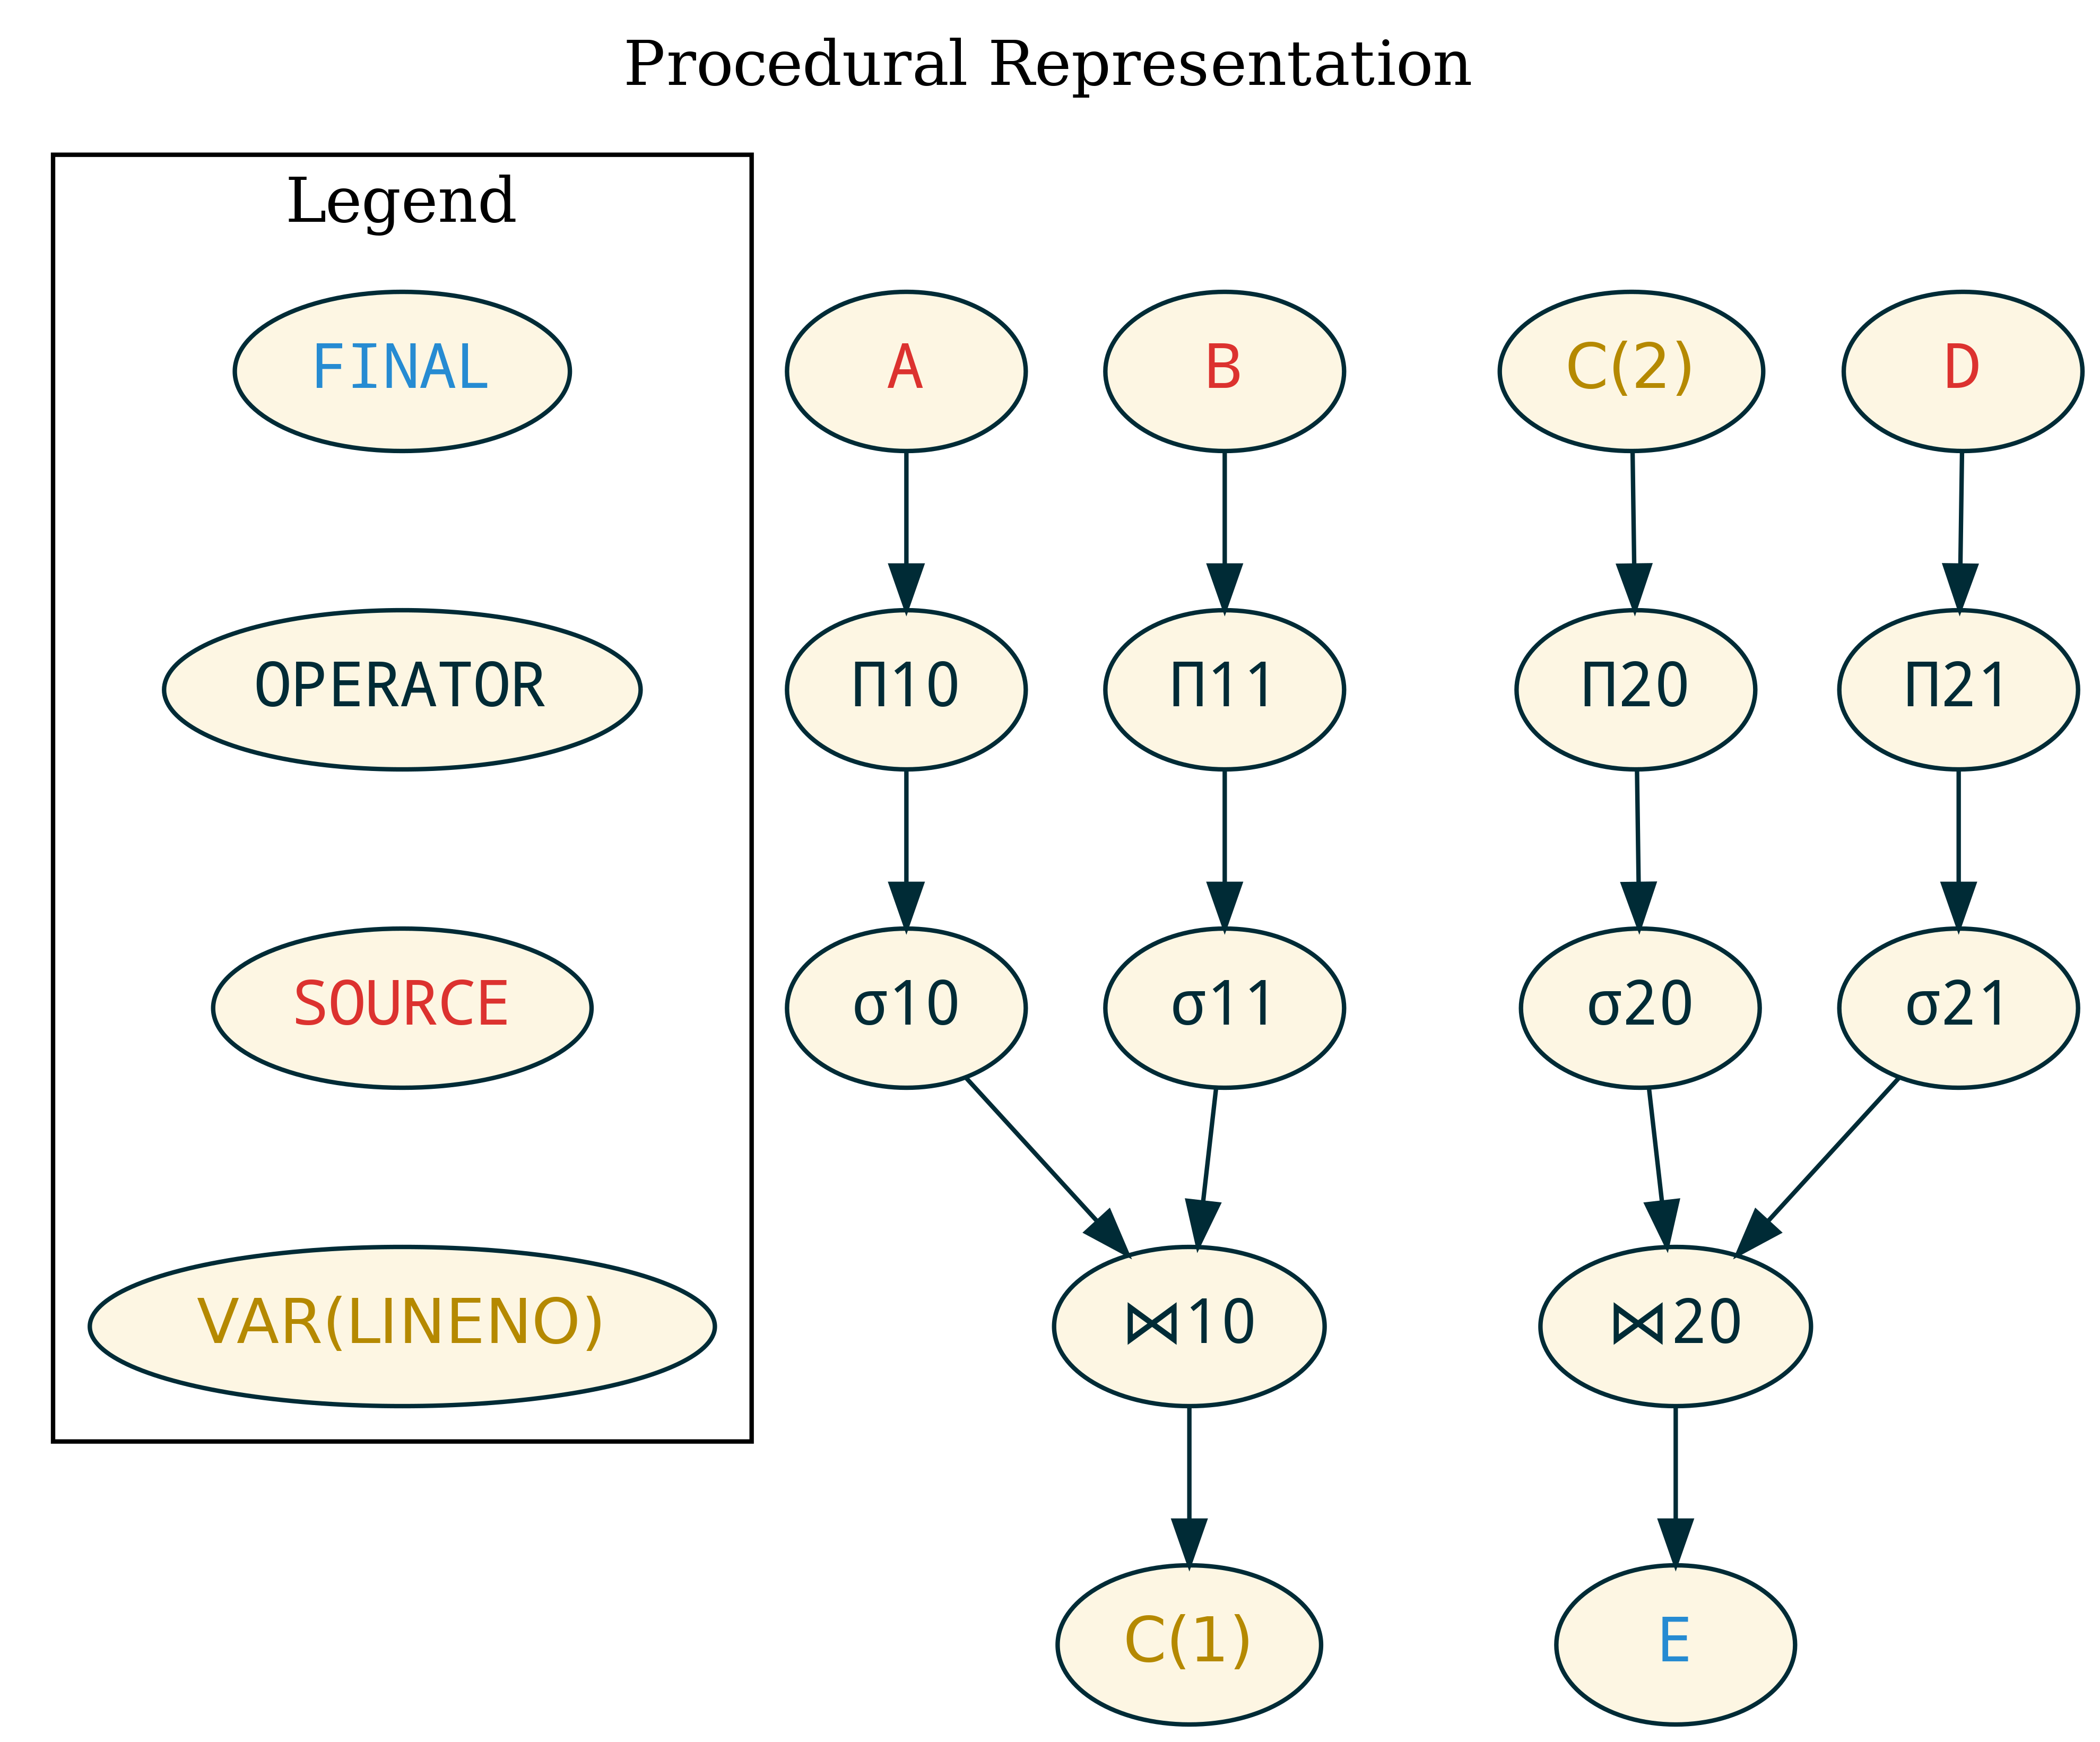

In [2]:
# Procedural Representation (PR)

PR = nx.DiGraph(dpi=600, labelloc='t', label='Procedural Representation', layout='dot')

PR.add_node('A', **SOURCE)
PR.add_node('B', **SOURCE)
PR.add_node('C(1)', **VAR)
PR.add_node('C(2)', **VAR)
PR.add_node('D', **SOURCE)
PR.add_node('E', **FINAL)
PR.add_node('Π10', **OPERATOR)
PR.add_node('σ10', **OPERATOR)
PR.add_node('⋈10', **OPERATOR)
PR.add_node('Π11', **OPERATOR)
PR.add_node('σ11', **OPERATOR)
PR.add_node('Π20', **OPERATOR)
PR.add_node('σ20', **OPERATOR)
PR.add_node('⋈20', **OPERATOR)
PR.add_node('Π21', **OPERATOR)
PR.add_node('σ21', **OPERATOR)

PR.add_edge('A', 'Π10',color=C_BLACK)
PR.add_edge('Π10', 'σ10',color=C_BLACK)
PR.add_edge('σ10', '⋈10',color=C_BLACK)
PR.add_edge('⋈10', 'C(1)',color=C_BLACK)
PR.add_edge('B', 'Π11',color=C_BLACK)
PR.add_edge('Π11', 'σ11',color=C_BLACK)
PR.add_edge('σ11', '⋈10',color=C_BLACK)

PR.add_edge('C(2)', 'Π20',color=C_BLACK)
PR.add_edge('Π20', 'σ20',color=C_BLACK)
PR.add_edge('σ20', '⋈20',color=C_BLACK)
PR.add_edge('⋈20', 'E',color=C_BLACK)
PR.add_edge('D', 'Π21',color=C_BLACK)
PR.add_edge('Π21', 'σ21',color=C_BLACK)
PR.add_edge('σ21', '⋈20',color=C_BLACK)
#TODO inverse order

showgraph(PR, width=600)

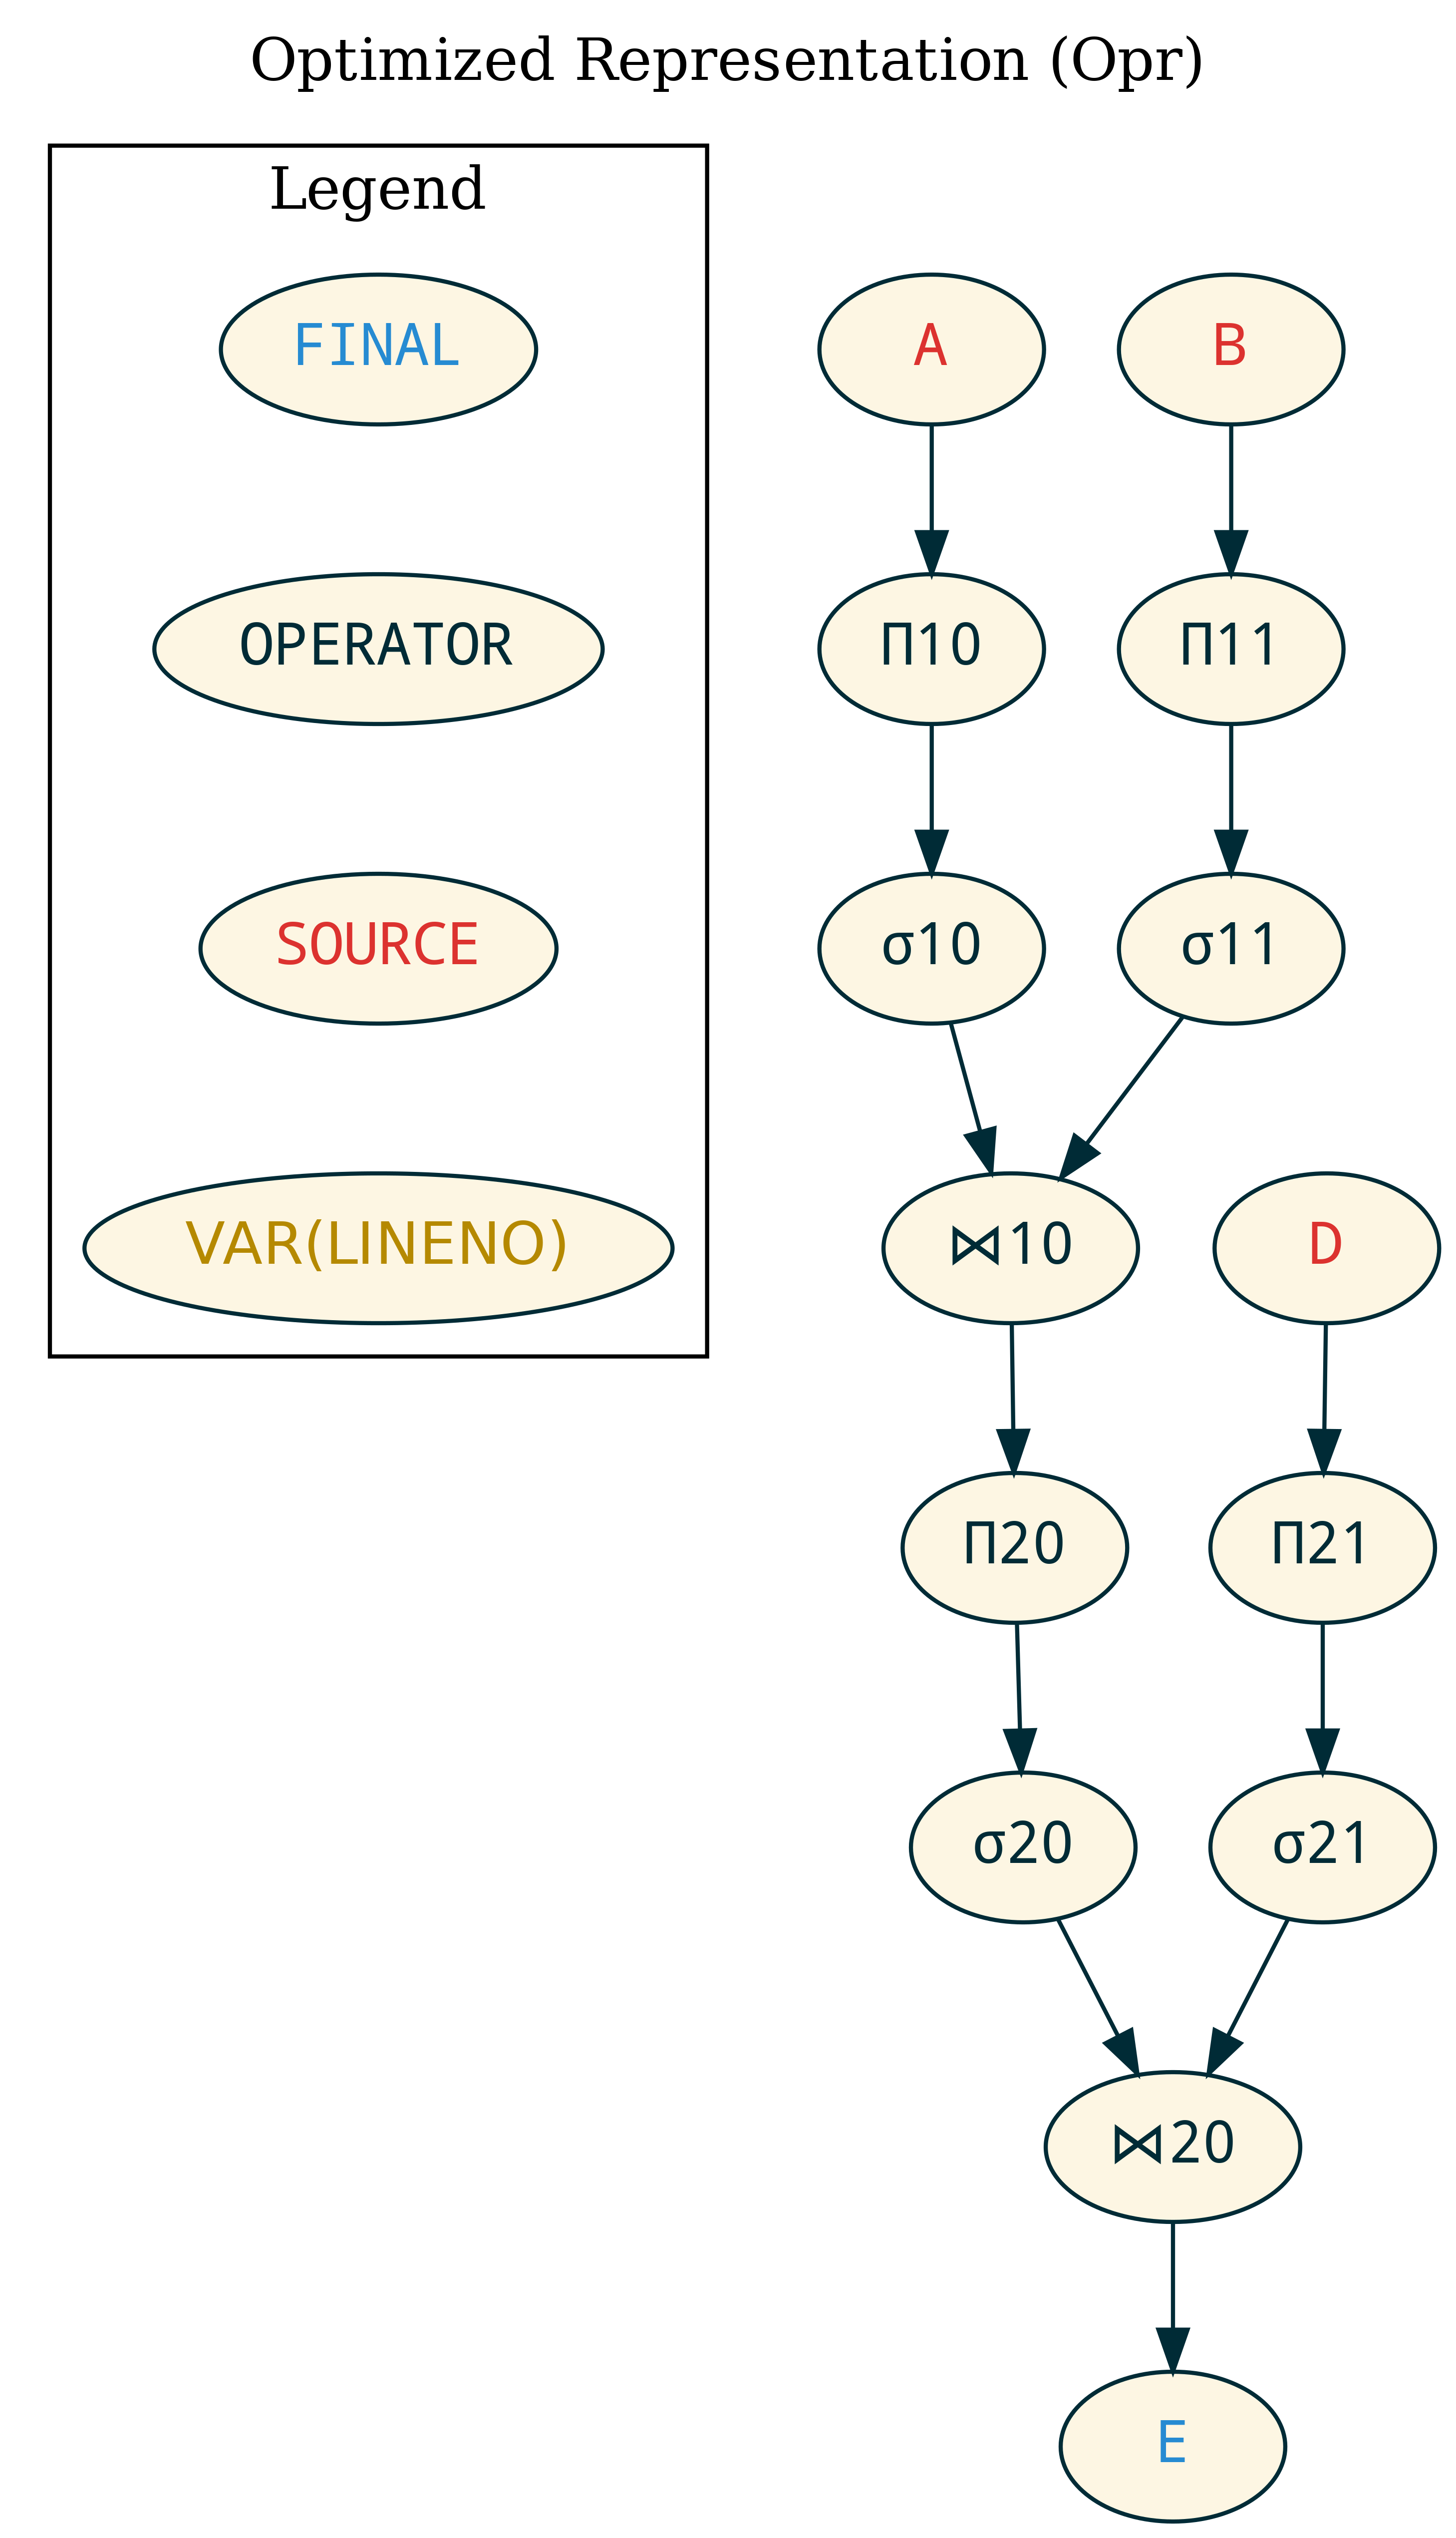

In [3]:
# Optimized Representation OpR
OpR=copy.deepcopy(PR)
OpR.graph['label']='Optimized Representation (Opr)'
OpR.add_edge('⋈10', 'Π20',color=C_BLACK)
OpR.remove_node('C(1)')
OpR.remove_node('C(2)')

showgraph(OpR, width=300)

# Adding Mutability into the equation

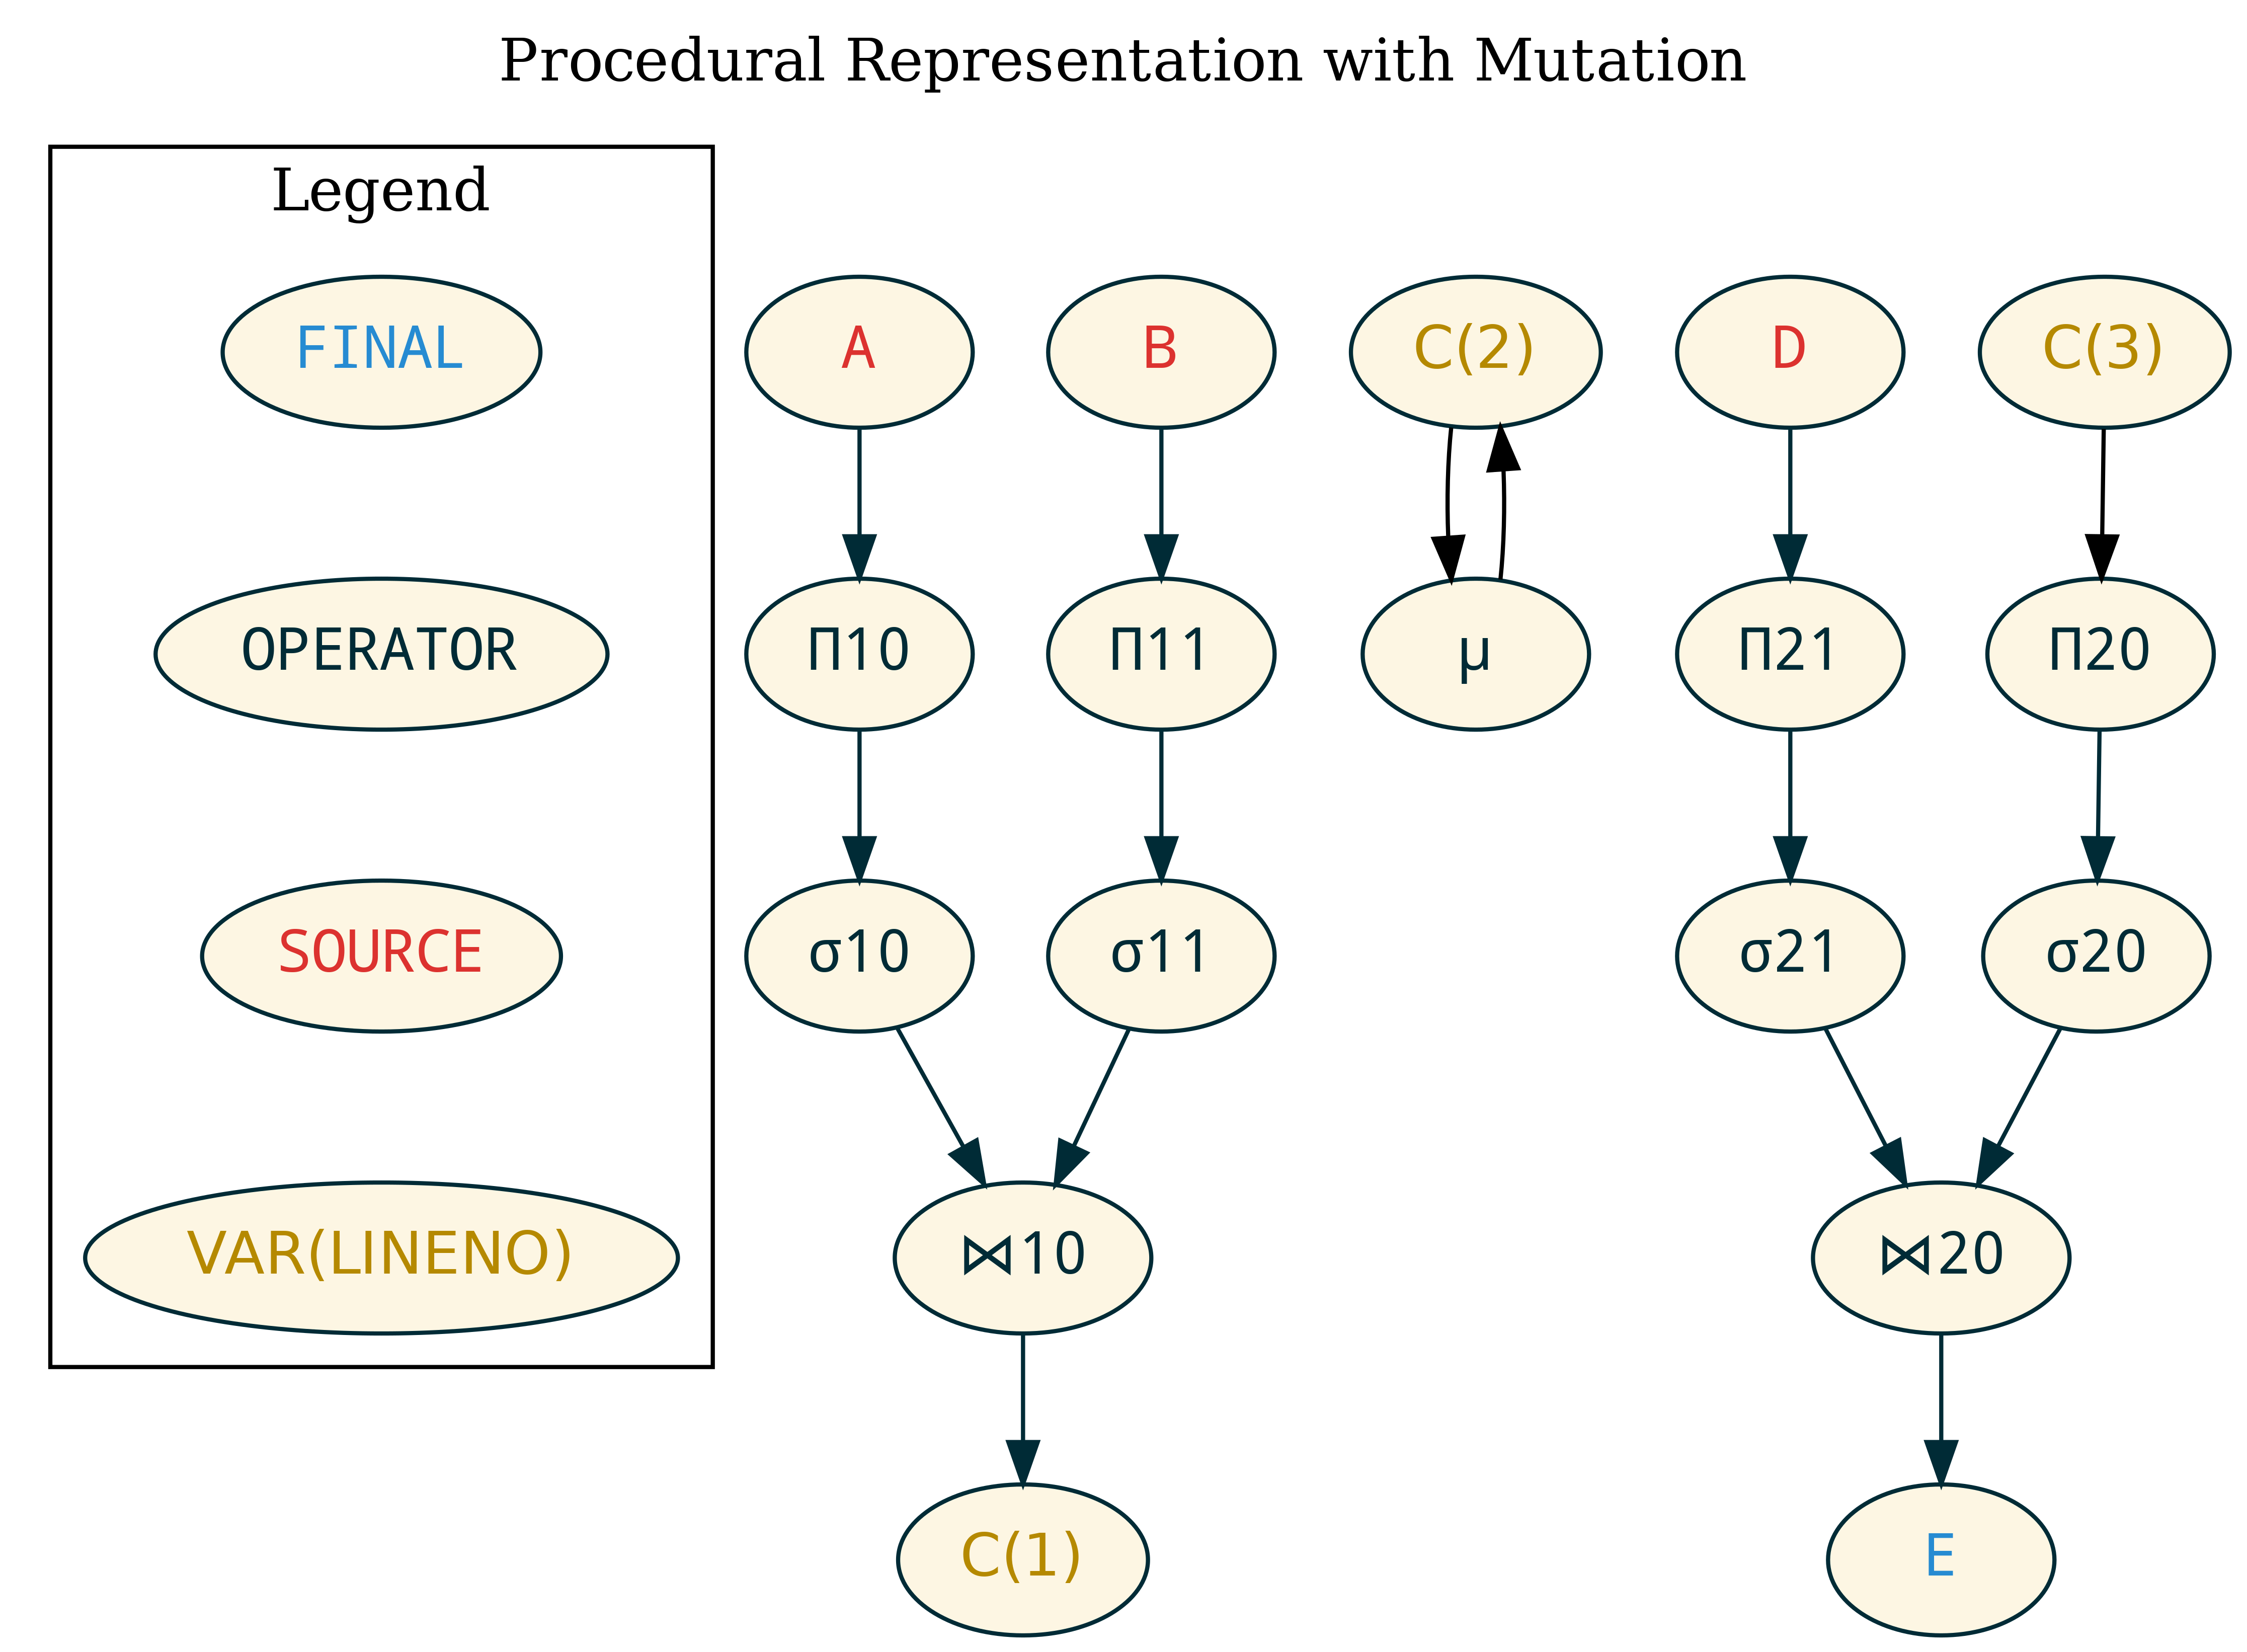

In [4]:
PR_mute=copy.deepcopy(PR)
PR_mute.graph['label']='Procedural Representation with Mutation'

PR_mute.add_node('C(3)', **VAR)
PR_mute.add_node('μ', **OPERATOR)

PR_mute.add_edge('C(2)', 'μ')
PR_mute.add_edge('μ', 'C(2)')
PR_mute.add_edge('C(3)', 'Π20')
PR_mute.remove_edge('C(2)', 'Π20')

showgraph(PR_mute, width=600)

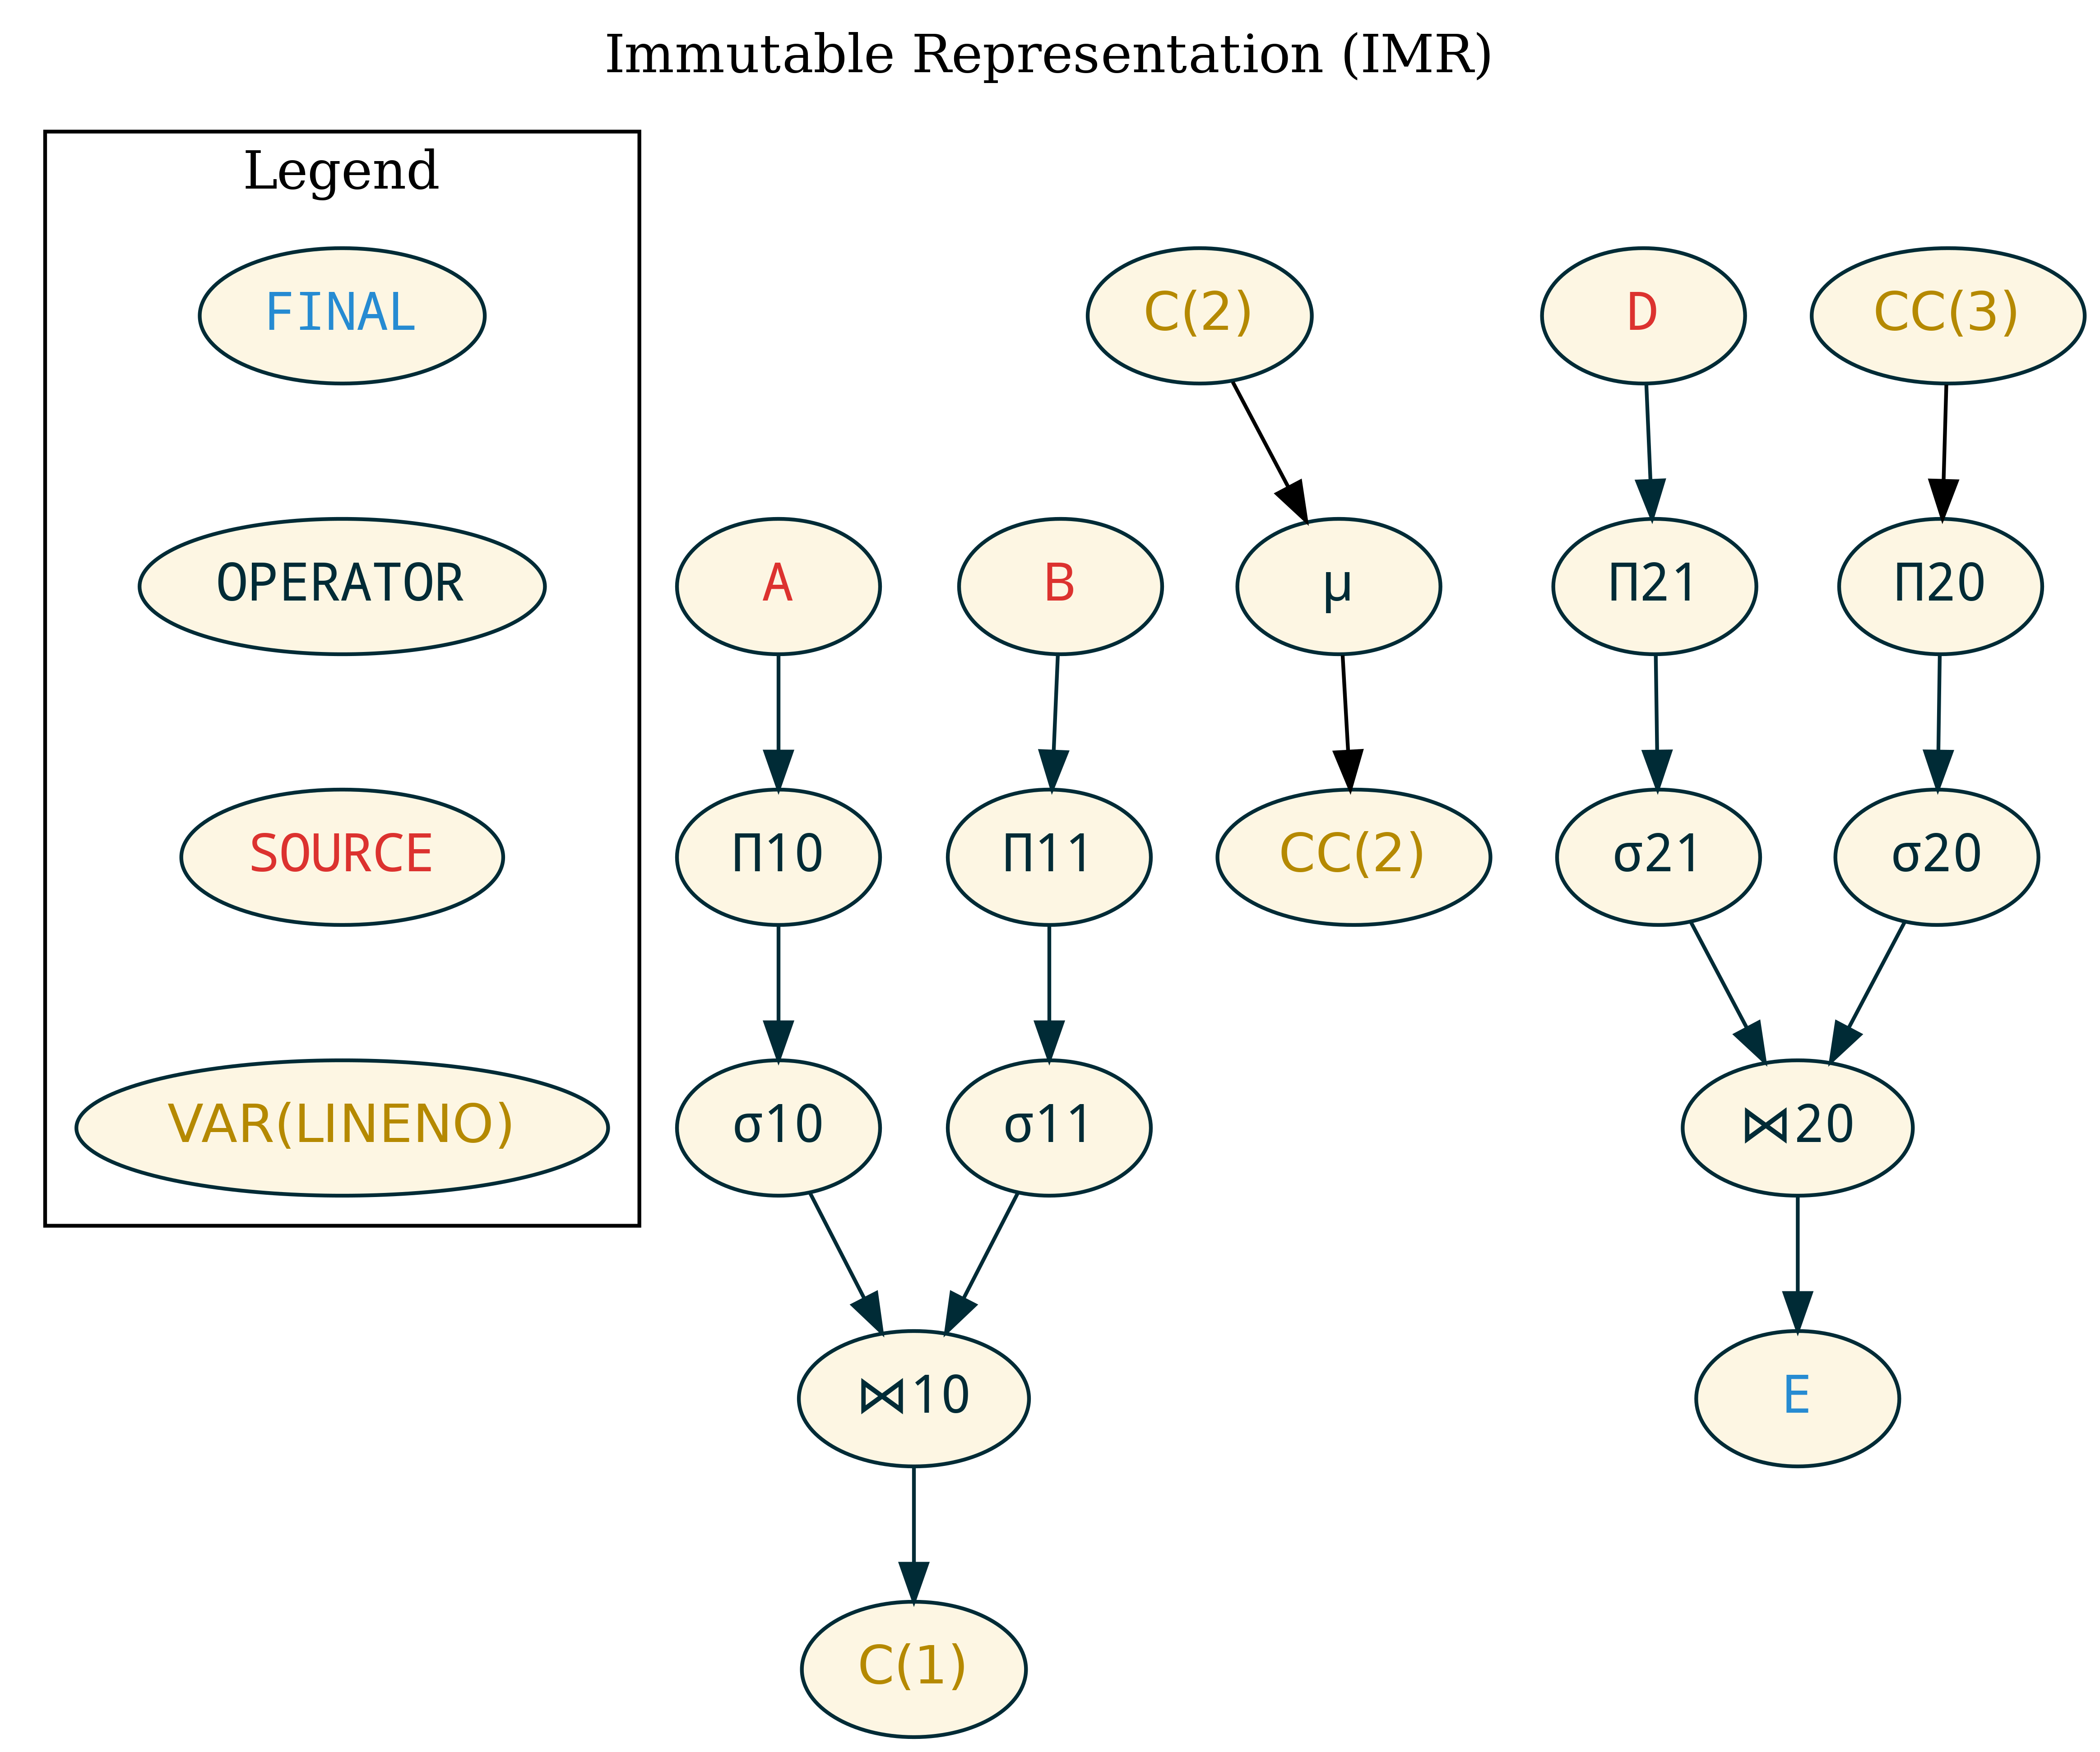

In [5]:
IMR=copy.deepcopy(PR_mute)
IMR.graph['label']='Immutable Representation (IMR)'

IMR.add_node('CC(2)', **VAR)
IMR.add_node('CC(3)', **VAR)

IMR.remove_node('C(3)')

IMR.add_edge('μ', 'CC(2)')
IMR.add_edge('CC(3)', 'Π20')
IMR.remove_edge('μ', 'C(2)')

#style hack
IMR.add_edge('C(2)', 'B', style='invis')

showgraph(IMR, width=600)

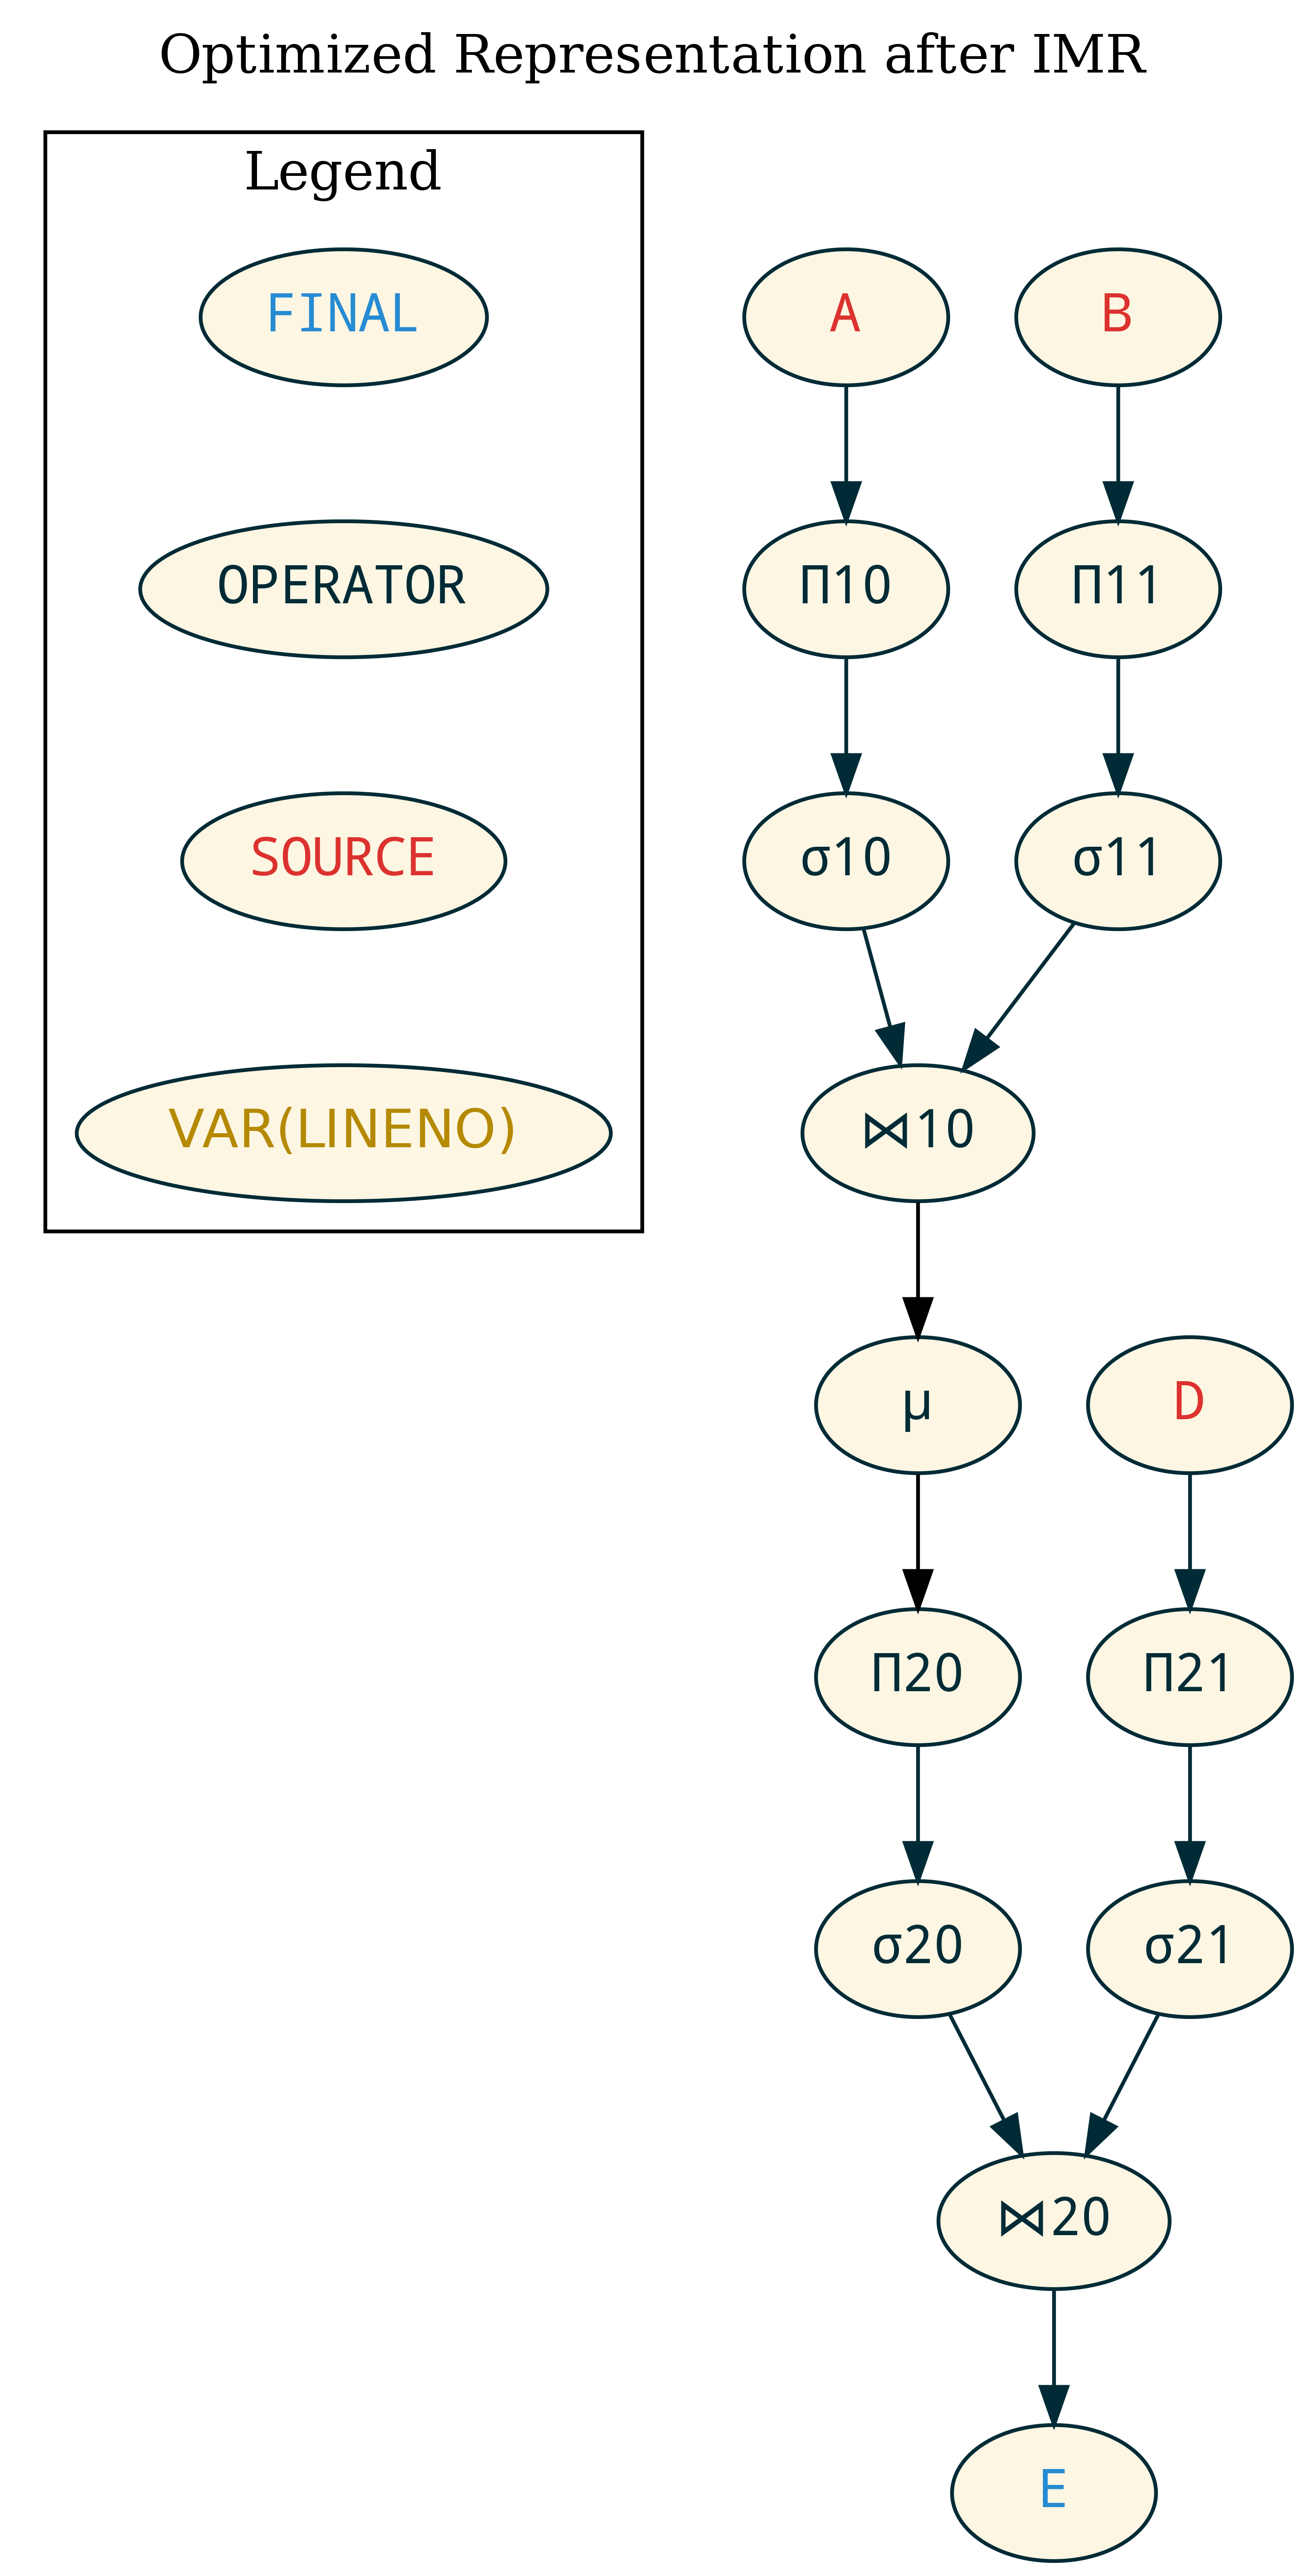

In [10]:
Opr_IM=copy.deepcopy(IMR)
Opr_IM.graph['label']='Optimized Representation after IMR'

Opr_IM.remove_node('C(1)')
Opr_IM.remove_node('C(2)')
Opr_IM.remove_node('CC(2)')
Opr_IM.remove_node('CC(3)')

Opr_IM.add_edge('⋈10', 'μ')
Opr_IM.add_edge('μ', 'Π20')

showgraph(Opr_IM, width=300)